In [1]:
%pylab inline
import glob
import json
logs_files_names = glob.glob("logs/*")

Populating the interactive namespace from numpy and matplotlib


In [2]:
def process_log(filename):
    with open(filename, 'r') as f:
        data = [
            np.float64(x.split()[2])
            for x in f
            if ' * Prec@1' in x
        ]
        return data
Nice_names = {
    'sign_symmetry_last_backpropagation': 'Sign symmetry (conv layers) + backpropagation (FC layer)',
    'backpropagation': 'Backpropagation',
    'sign_symmetry': 'Sign symmetry',
    'feedback_alignment_last_backpropagation': 'Feedback alignment (conv layers) + backpropagation (FC layer)',
    'feedback_alignment': 'Feedback alignment',
}
logs = {
    file_name[5:]: process_log(file_name)
    for file_name in logs_files_names
}
with open('cifar_results.json', 'w') as f:
    json.dump(logs, f)

In [3]:
with open('cifar_results.json', 'r') as f:
    logs = {k: np.array(v) for k,v in json.load(f).items()}

### Creating plot
Changing EPOCH variables, sayes ow much epochs shoud be displayed on plot

remark: values exctracted form logs are % of correctly predicted images. On plot I've transformed it to Error rate. (Same effect as in paper)

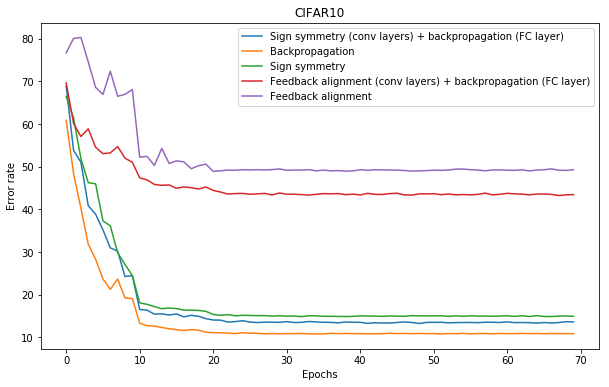

In [4]:
EPOCHS = 70
figure(figsize=(10,6))
for k,v in logs.items():
    plot(np.arange(EPOCHS), 100. - v[:EPOCHS], label=Nice_names[k])
xlabel('Epochs')
ylabel('Error rate')
title('CIFAR10')
legend()
savefig('CIFAR10_results.png')
show()

## Top Val Error %

For specific algorithms

In [5]:
for k,v in logs.items():
    print(k, max(v))

sign_symmetry_last_backpropagation 86.73
backpropagation 89.21
sign_symmetry 85.13
feedback_alignment_last_backpropagation 56.76
feedback_alignment 51.1
